In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from matplotlib import cm
import seaborn as sns

In [2]:
# Template Kaggle Notebook
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df_train = pd.read_csv('cs-training.csv',index_col=0)
df_test = pd.read_csv('cs-test.csv',index_col=0)
Submission = pd.read_csv('sampleEntry.csv')

# EDA

In [4]:
df_train.head(15000)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14996,0,0.051347,68,0,0.405181,4207.0,10,0,1,0,0.0
14997,0,0.044247,76,0,0.338915,4000.0,6,0,1,0,0.0
14998,0,0.014464,60,0,0.238159,9732.0,12,0,2,0,1.0
14999,0,0.057423,47,0,96.000000,NaN,5,0,0,0,0.0


In [5]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
print(df_train.shape)
print(df_test.shape)
#Semua Fitur sama

(150000, 11)
(101503, 11)


In [7]:
df_train.info()
#Melihat tipe data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [9]:
df_test.isnull().sum()
#ada Beberapa data Null dalam Test data

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [10]:
df_train.isnull().sum()
#ada Beberapa data Null dalam train data

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [11]:


df_train.describe()



,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

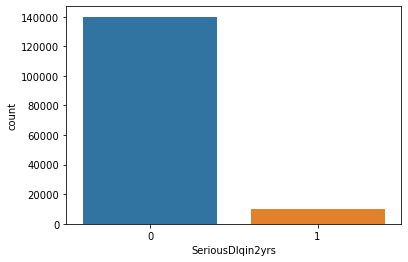

In [12]:
sns.countplot(x="SeriousDlqin2yrs", data=df_train)
# Data 1 adalah orang yang memiliki Tunjakan 
# Data 0 orang yang tidak memiliki Tunjakan

In [13]:
print(f"Percentage of default: {sum(df_train['SeriousDlqin2yrs'] == 1)/len(df_train)*100:.2f}%")
print(f"Percentage of non-default: {sum(df_train['SeriousDlqin2yrs'] == 0)/len(df_train)*100:.2f}%")

#Bisa dilihat bahwa sekitar 93 persen tidak memiliki Tunjakan

Percentage of default: 6.68%
Percentage of non-default: 93.32%


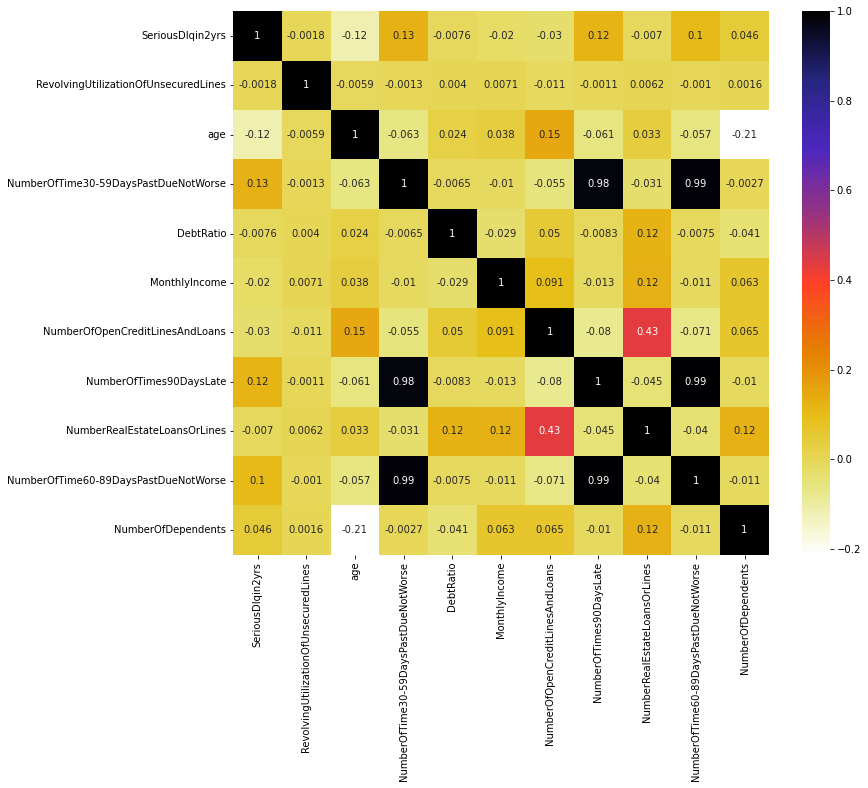

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()
#Visualisasi hubungan antara feature

In [15]:


df_train["age"].describe()



count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

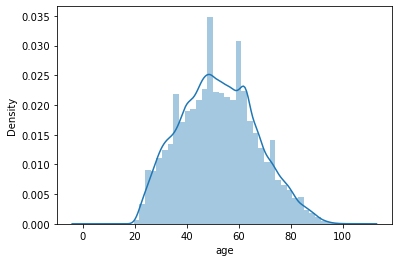

In [16]:
sns.distplot(df_train["age"])

#Dilihat bahwa Seorang umur 40 dengan 60 apply untuk kartu kredit 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

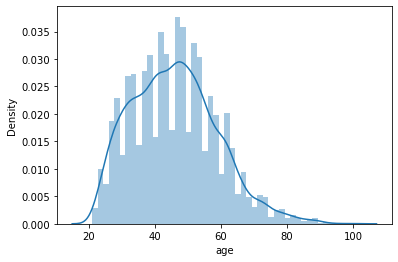

In [17]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])
#dilihat pada histogram dibawah bahwa ada penunjakan kartu kredit pada umur 25 -45

# Feature Enginering Menghilankan Outlier

In [97]:
from scipy import stats
import numpy as np

def remove_outliers(df, feature_name, max_scale_from_std):
    f = df[feature_name]
    std = f.std()
    distance_from_mean = f - f.mean()
    condition =np.abs(distance_from_mean) >= max_scale_from_std * std
    df.loc[condition, feature_name] = f.mean()
    
    return df

Text(0.5, 0, 'Sesudah')

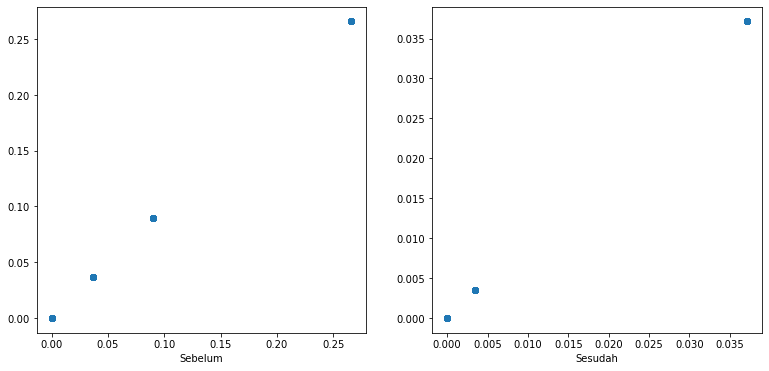

In [101]:

X=df_train['NumberOfTimes90DaysLate']


fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(X, X)
axes[0].set_xlabel("Sebelum")

df=remove_outliers(df_train,"NumberOfTimes90DaysLate", 3)
X=df_train["NumberOfTimes90DaysLate"]

axes[1].scatter(X, X)
axes[1].set_xlabel("Sesudah")

Text(0.5, 0, 'Sesudah')

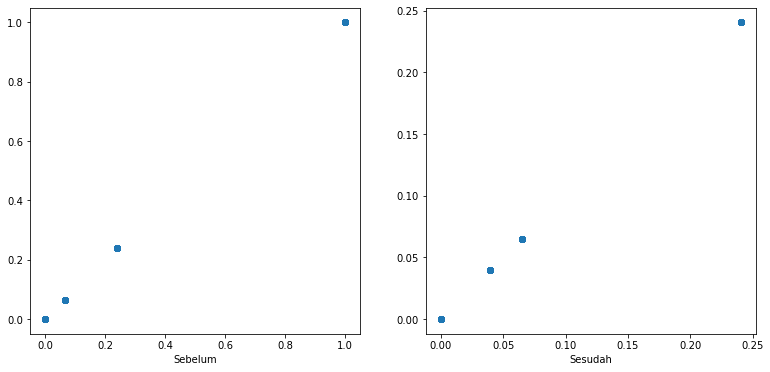

In [99]:

X=df_train['NumberOfTime60-89DaysPastDueNotWorse']


fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(X, X)
axes[0].set_xlabel("Sebelum")

df=remove_outliers(df_train, "NumberOfTime60-89DaysPastDueNotWorse", 3)
X=df_train['NumberOfTime60-89DaysPastDueNotWorse']

axes[1].scatter(X, X)
axes[1].set_xlabel("Sesudah")

Text(0.5, 0, 'Sesudah')

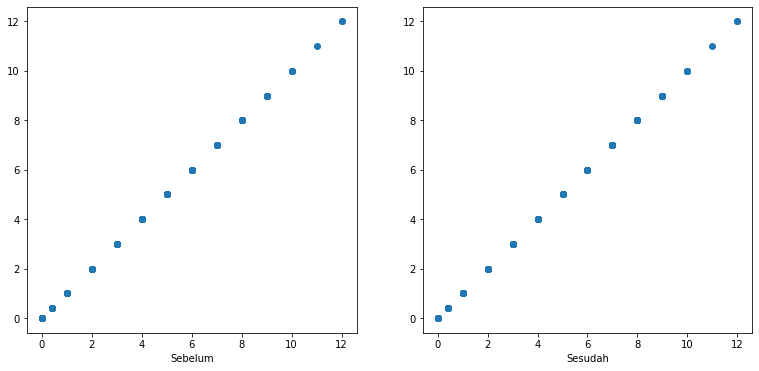

In [100]:

X=df_train['NumberOfTime30-59DaysPastDueNotWorse']
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].scatter(X, X)
axes[0].set_xlabel("Sebelum")

df=remove_outliers(df_train, "NumberOfTime30-59DaysPastDueNotWorse", 3)
X=df_train["NumberOfTime30-59DaysPastDueNotWorse"]

axes[1].scatter(X, X)
axes[1].set_xlabel("Sesudah")

# Hasil Outlier bisa lebih Baik

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

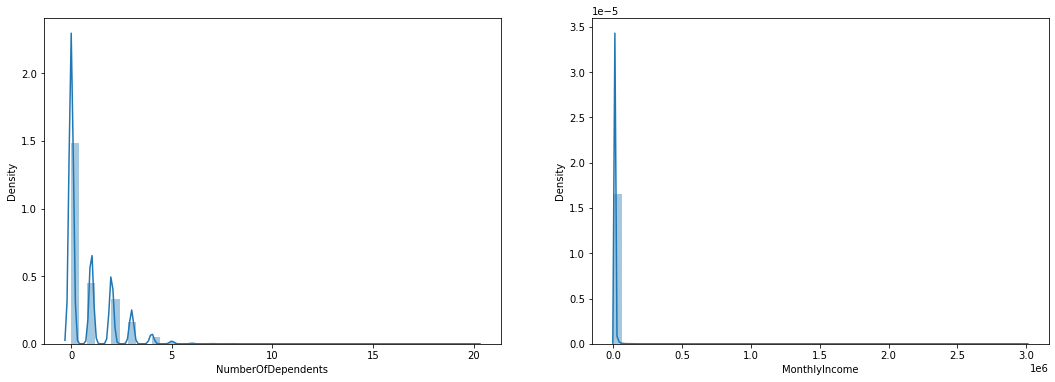

In [22]:
fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
sns.distplot(df_train["NumberOfDependents"], ax=ax[0])
sns.distplot(df_train["MonthlyIncome"], ax=ax[1])

Mencari Kemiringan Data berdasarkan Mean,Median Modus

In [23]:
number_of_dependents_train = df_train["NumberOfDependents"]
number_of_dependents_train_mean = number_of_dependents_train.mean()
number_of_dependents_train_median = number_of_dependents_train.median()
number_of_dependents_train_mode = number_of_dependents_train.mode().mean()
print("Data Training")
print("Number Of Dependents")
print("Mean NOD:", number_of_dependents_train_mean)
print("Median NOD:", number_of_dependents_train_median)
print("Mod Mean NOD:", number_of_dependents_train_mode)

Data Training
Number Of Dependents
Mean NOD: 0.7572222678605657
Median NOD: 0.0
Mod Mean NOD: 0.0


In [24]:
monthly_income_train = df_train["MonthlyIncome"]
monthly_income_train_mean = monthly_income_train.mean()
monthly_income_train_median = monthly_income_train.median()
monthly_income_train_mode = monthly_income_train.mode().mean()

print("Monthly Income")
print("Mean MI:", monthly_income_train_mean)
print("Median MI:", monthly_income_train_median)
print("Mod Mean MI:", monthly_income_train_mode)



Monthly Income
Mean MI: 6670.221237392844
Median MI: 5400.0
Mod Mean MI: 5000.0


In [25]:
# Data Testing
number_of_dependents_test = df_test["NumberOfDependents"]
number_of_dependents_test_mean = number_of_dependents_test.mean()
number_of_dependents_test_median = number_of_dependents_test.median()
number_of_dependents_test_mode = number_of_dependents_test.mode().mean()


print("Data Testing")
print("Number Of Dependents")
print("Mean NOD:", number_of_dependents_test_mean)
print("Median NOD:", number_of_dependents_test_median)
print("Mod Mean NOD:", number_of_dependents_test_mode)
print("")


Data Testing
Number Of Dependents
Mean NOD: 0.7690463909705998
Median NOD: 0.0
Mod Mean NOD: 0.0



In [26]:
monthly_income_test =df_test["MonthlyIncome"]
monthly_income_test_mean = monthly_income_test.mean()
monthly_income_test_median = monthly_income_test.median()
monthly_income_test_mode = monthly_income_test.mode().mean()

print("Monthly Income")
print("Mean MI:", monthly_income_test_mean)
print("Median MI:", monthly_income_test_median)
print("Mod Mean MI:", monthly_income_test_mode)

Monthly Income
Mean MI: 6855.0355896805895
Median MI: 5400.0
Mod Mean MI: 5000.0


In [27]:
#Mengisi data yang hilang dengan nilai Modus
df_train['NumberOfDependents'].fillna(number_of_dependents_train_mode, inplace=True)
df_train['MonthlyIncome'].fillna(monthly_income_train_mode, inplace=True)

In [28]:
df_test['NumberOfDependents'].fillna(number_of_dependents_test_mode, inplace=True)
df_test['MonthlyIncome'].fillna(monthly_income_test_mode, inplace=True)

In [29]:
df_train.isnull().sum()#Mengcek Nilai yang hilang

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [30]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

# Menggunakan Logistic Regression Untuk Base Model Iteration

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [40]:


x = df_train.drop("SeriousDlqin2yrs", axis = 1)
y = df_train["SeriousDlqin2yrs"]

x.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         150000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  float64
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 9   NumberOfDependents                    150000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 12.6 MB


In [41]:
# from sklearn.model_selection import train_test_split #untuk membuat model

# # untuk training/testing
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.model_selection import train_test_split #untuk membuat model

# untuk training/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [43]:


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(105000, 10)
(105000,)
(45000, 10)
(45000,)


In [44]:
parameter = {
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2', 'elasticnet'],
    'C': [ 1e-1, 1],
}

lr = LogisticRegression()

In [46]:
%%capture --no-display

gs_lr = GridSearchCV(
    estimator=lr,
    param_grid=parameter,
    cv=5,
)

lr_fit = gs_lr.fit(x_train, y_train)

In [47]:
y_pred = lr_fit.predict(x_test)

In [48]:
y_pred_proba = lr_fit.predict_proba(x_test)
y_pred_proba = y_pred_proba[: , 1]
y_test_predicted = lr_fit.predict_proba(x_test)[:,1]

In [76]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [100, 250],
    'max_depth': [8, 24],
    'num_leaves': [25, 50],
    'first_metric_only': [True]
}


lgb = LGBMClassifier()

In [77]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
    estimator=lgb,
    param_grid=parameter,
    cv=5,
)
lgbm_fit = gs.fit(x_train, y_train)

In [78]:
print(lgbm_fit.best_params_)
print(lgbm_fit.best_score_)

{'first_metric_only': True, 'max_depth': 24, 'n_estimators': 100, 'num_leaves': 25}
0.9368000000000001


In [79]:
print("training accuracy: {:.2f}".format(gs.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(gs.score(x_test, y_test) * 100))

training accuracy: 94.11
validation accuracy: 93.72


# Result Comparison

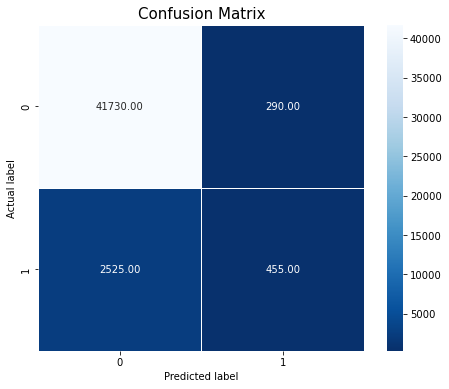

In [80]:
#confusion matrix
#melihat hasil confusion matrix Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     42020
           1       0.61      0.15      0.24      2980

    accuracy                           0.94     45000
   macro avg       0.78      0.57      0.61     45000
weighted avg       0.92      0.94      0.92     45000



In [82]:
roc_auc_score(y_test, y_pred_proba)

0.8113492576242057

In [83]:
continous_proba = lgbm_fit.best_estimator_.predict_proba(x_test)

proba = continous_proba[:, 1]
proba[proba >= 0.5] = 1
proba[proba < 0.5] = 0
proba = proba.astype(int)

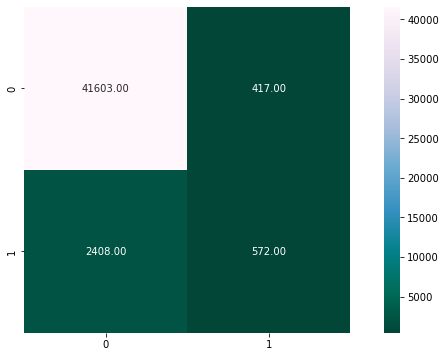

In [84]:
# Confusion Matrix LightBGM
matrix = confusion_matrix(y_test, proba) 

plt.figure(figsize=(12, 6))

sns.heatmap(matrix, annot=True, fmt=".2f", square=True, cmap="PuBuGn_r")
plt.show()

In [85]:
print(classification_report(y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42020
           1       0.58      0.19      0.29      2980

    accuracy                           0.94     45000
   macro avg       0.76      0.59      0.63     45000
weighted avg       0.92      0.94      0.92     45000



In [86]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, proba)

0.591011231468556

In [87]:


Submission.head()



,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [92]:
#Menggunakkan Logistic Regression Saya Mendapatkan score 0.81
x = df_test.drop("SeriousDlqin2yrs", axis=1)
y = lgbm_fit.predict_proba(x)[:, 1]
X_train=df_train.drop("SeriousDlqin2yrs", axis=1)


predicted = pd.DataFrame({'Id': Submission['Id'], 'Probability': y})
predicted.to_csv("submissions.csv", index=False)






In [93]:
predicted.head(15000)


,Id,Probability
0,1,0.075494
1,2,0.066593
2,3,0.012522
3,4,0.077347
4,5,0.096071
...,...,...
14995,14996,0.310022
14996,14997,0.035616
14997,14998,0.012706
14998,14999,0.131544
